In [ ]:

# Project: Sentiment Analysis - iPhone 15 (128GB)

# Objective: Analyze customer sentiment to identify product strengths and weaknesses.
#step 1
# Libraries:
# Selenium - Automates web scraping
# BeautifulSoup - Parses HTML to extract review data
# Pandas - Handles data cleaning and analysis
# TextBlob - Performs sentiment analysis
# Matplotlib/Seaborn - Visualizes the data

# Step 1: Data Collection
# 1. Use Selenium to scrape customer reviews from Flipkart.
# 2. Extract Username, Rating, and Review Text for each review.
# 3. Use BeautifulSoup to parse the HTML and extract required data.
# 4. Handle pagination to collect reviews from multiple pages.
# 5. Store the data in a structured format (e.g., CSV or DataFrame).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from textblob import TextBlob
from nltk import sent_tokenize
import requests
import nltk

driver = webdriver.Chrome()

In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import time

# Create empty lists to store data
names = []
ratings = []
reviews = []
cities = []

# Flipkart iPhone 15 128GB review URL
url = "https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W"

# Setup Selenium ChromeDriver
driver = webdriver.Chrome()
driver.get(url)
time.sleep(3)  # wait for page to load

# Loop through multiple pages of reviews
for page in range(1, 150):
    new_url = url + f"&page={page}"
    driver.get(new_url)
    time.sleep(2)

    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract customer names, ratings, reviews, and cities
    name_tags = soup.find_all("p", class_="_2NsDsF AwS1CA")
    rating_tags = soup.find_all("div", class_="XQDdHH Ga3i8K")
    review_tags = soup.find_all("div", class_="ZmyHeo")
    city_tags = soup.find_all("p", {"class": "MztJPv"})

    # Break loop if no data found on a page
    if not name_tags and not rating_tags and not review_tags:
        print(f"No data found on page {page}. Stopping.")
        break

    for tag in name_tags:
        names.append(tag.text)
    for tag in rating_tags:
        ratings.append(tag.text)
    for tag in review_tags:
        reviews.append(tag.text)
    for tag in city_tags:
        cities.append(tag.text)

    print(f"✅ Scraped page {page}")

# Close the browser
driver.quit()

# Ensure all lists are the same length
min_len = min(len(names), len(ratings), len(reviews), len(cities))
names = names[:min_len]
ratings = ratings[:min_len]
reviews = reviews[:min_len]
cities = cities[:min_len]

# Create a DataFrame
df = pd.DataFrame({
    "Customer Name": names,
    "City": cities,
    "Ratings": ratings,
    "Reviews": reviews
})

# Show the DataFrame
print(df.head())

# Save to CSV
df.to_csv("iphone15_flipkart_reviews.csv", index=False)
print("💾 Data saved to iphone15_flipkart_reviews.csv")


✅ Scraped page 1
✅ Scraped page 2
✅ Scraped page 3
✅ Scraped page 4
✅ Scraped page 5
✅ Scraped page 6
✅ Scraped page 7
✅ Scraped page 8
✅ Scraped page 9
✅ Scraped page 10
✅ Scraped page 11
✅ Scraped page 12
✅ Scraped page 13
✅ Scraped page 14
✅ Scraped page 15
✅ Scraped page 16
✅ Scraped page 17
✅ Scraped page 18
✅ Scraped page 19
✅ Scraped page 20
No data found on page 21. Stopping.
      Customer Name                              City Ratings  \
0  Mousam  Guha Roy       Certified Buyer, Matialihat       4   
1    bijaya mohanty        Certified Buyer, Baleshwar       5   
2            Ajin V         Certified Buyer, Balaghat       5   
3      Nikhil Kumar  Certified Buyer, Meerut Division       5   
4   Prithivi Boruah          Certified Buyer, Bokajan       5   

                                             Reviews  
0                                 Very niceREAD MORE  
1  Just go for it.Amazing one.Beautiful camera wi...  
2                      High quality camera😍READ MORE  
3 

In [13]:
df

,Customer Name,City,Ratings,Reviews
0,Mousam Guha Roy,"Certified Buyer, Matialihat",4,Very niceREAD MORE
1,bijaya mohanty,"Certified Buyer, Baleshwar",5,Just go for it.Amazing one.Beautiful camera wi...
2,Ajin V,"Certified Buyer, Balaghat",5,High quality camera😍READ MORE
3,Nikhil Kumar,"Certified Buyer, Meerut Division",5,Switch from OnePlus to iPhone I am stunned wit...
4,Prithivi Boruah,"Certified Buyer, Bokajan",5,Camera Quality Is Improved Loving ItREAD MORE
...,...,...,...,...
168,Motam Jamatia,"Certified Buyer, Teliamura",4,I phone is phone nothing but it's a brand that...
169,Kumar Patel,"Certified Buyer, Hyderabad",4,A Mixed Bag of BrillianceThe iPhone 15 flaunts...
170,Aalok Singh,"Certified Buyer, Mumbai",4,Much faster and best camera only issue of batt...
171,Ankit Verma,"Certified Buyer, Mohammadabad Ghazipur District",4,Awesome camra quality superb camra 😊READ MORE


In [ ]:
# Step 2: Data Cleaning and Preprocessing

# Steps:

# 1. Remove duplicates and handle missing values in the dataset.
#    - Drop duplicate reviews or user entries.
#    - Fill or drop missing values as necessary.

# 2. Text Preprocessing:
#    - Convert all review text to lowercase for uniformity.
#    - Remove special characters and extra spaces to clean the text.
#    - Tokenize the text (split into words or tokens).
#    - Remove stop words (commonly used words that don't add significant meaning).
#    - Apply lemmatization (reduce words to their root form, e.g., "running" to "run").


In [27]:
df["Customer Name"] = df["Customer Name"].str.title()
df


,Customer Name,City,Ratings,Reviews,Reviews_1,Buyer_Status
0,Mousam Guha Roy,Matialihat,4,Very nice,[Very nice],Certified Buyer
1,Bijaya Mohanty,Baleshwar,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,Certified Buyer
2,Ajin V,Balaghat,5,High quality camera😍,[High quality camera😍],Certified Buyer
3,Nikhil Kumar,Meerut Division,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,Certified Buyer
4,Prithivi Boruah,Bokajan,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],Certified Buyer
...,...,...,...,...,...,...
168,Motam Jamatia,Teliamura,4,I phone is phone nothing but it's a brand that...,[I phone is phone nothing but it's a brand tha...,Certified Buyer
169,Kumar Patel,Hyderabad,4,A Mixed Bag of BrillianceThe iPhone 15 flaunts...,[A Mixed Bag of BrillianceThe iPhone 15 flaunt...,Certified Buyer
170,Aalok Singh,Mumbai,4,Much faster and best camera only issue of batt...,[Much faster and best camera only issue of bat...,Certified Buyer
171,Ankit Verma,Mohammadabad Ghazipur District,4,Awesome camra quality superb camra 😊,[Awesome camra quality superb camra 😊],Certified Buyer


In [26]:
df["Reviews"] = df["Reviews"].str.replace("READ MORE","")
df

,Customer Name,City,Ratings,Reviews,Reviews_1,Buyer_Status
0,Mousam Guha Roy,Matialihat,4,Very nice,[Very nice],Certified Buyer
1,Bijaya Mohanty,Baleshwar,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,Certified Buyer
2,Ajin V,Balaghat,5,High quality camera😍,[High quality camera😍],Certified Buyer
3,Nikhil Kumar,Meerut Division,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,Certified Buyer
4,Prithivi Boruah,Bokajan,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],Certified Buyer
...,...,...,...,...,...,...
168,Motam Jamatia,Teliamura,4,I phone is phone nothing but it's a brand that...,[I phone is phone nothing but it's a brand tha...,Certified Buyer
169,Kumar Patel,Hyderabad,4,A Mixed Bag of BrillianceThe iPhone 15 flaunts...,[A Mixed Bag of BrillianceThe iPhone 15 flaunt...,Certified Buyer
170,Aalok Singh,Mumbai,4,Much faster and best camera only issue of batt...,[Much faster and best camera only issue of bat...,Certified Buyer
171,Ankit Verma,Mohammadabad Ghazipur District,4,Awesome camra quality superb camra 😊,[Awesome camra quality superb camra 😊],Certified Buyer


In [ ]:
# Step 3: Sentiment Analysis

# Tool: TextBlob

# Steps:

# 1. Use TextBlob to calculate the polarity score of each review.
#    - Polarity ranges from -1 (negative) to +1 (positive).

# 2. Classify sentiment based on polarity score:
#    - Positive: Polarity ≥ 0.1
#    - Negative: Polarity < 0.1

# 3. Store the sentiment classification (Positive/Negative) in the dataset.


In [30]:
df['Reviews_1'] = df["Reviews"].apply(sent_tokenize)
df

,Customer Name,City,Ratings,Reviews,Reviews_1,Buyer_Status
0,Mousam Guha Roy,Matialihat,4,Very nice,[Very nice],Certified Buyer
1,Bijaya Mohanty,Baleshwar,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,Certified Buyer
2,Ajin V,Balaghat,5,High quality camera😍,[High quality camera😍],Certified Buyer
3,Nikhil Kumar,Meerut Division,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,Certified Buyer
4,Prithivi Boruah,Bokajan,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],Certified Buyer
...,...,...,...,...,...,...
168,Motam Jamatia,Teliamura,4,I phone is phone nothing but it's a brand that...,[I phone is phone nothing but it's a brand tha...,Certified Buyer
169,Kumar Patel,Hyderabad,4,A Mixed Bag of BrillianceThe iPhone 15 flaunts...,[A Mixed Bag of BrillianceThe iPhone 15 flaunt...,Certified Buyer
170,Aalok Singh,Mumbai,4,Much faster and best camera only issue of batt...,[Much faster and best camera only issue of bat...,Certified Buyer
171,Ankit Verma,Mohammadabad Ghazipur District,4,Awesome camra quality superb camra 😊,[Awesome camra quality superb camra 😊],Certified Buyer


In [36]:
from textblob import TextBlob

def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df['Polarity'] = df['Reviews_1'].apply(get_polarity)

def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df['Average_Polarity'] = df['Polarity'].apply(calculate_average_polarity)

df.head(10)

,Customer Name,City,Ratings,Reviews,Reviews_1,Buyer_Status,Polarity,Average_Polarity
0,Mousam Guha Roy,Matialihat,4,Very nice,[Very nice],Certified Buyer,[0.78],0.780000
1,Bijaya Mohanty,Baleshwar,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,Certified Buyer,[0.26666666666666666],0.266667
2,Ajin V,Balaghat,5,High quality camera😍,[High quality camera😍],Certified Buyer,[0.16],0.160000
3,Nikhil Kumar,Meerut Division,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,Certified Buyer,"[0.0, 1.0]",0.500000
4,Prithivi Boruah,Bokajan,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],Certified Buyer,[0.6],0.600000
...,...,...,...,...,...,...,...,...
168,Motam Jamatia,Teliamura,4,I phone is phone nothing but it's a brand that...,[I phone is phone nothing but it's a brand tha...,Certified Buyer,"[0.0, 0.5, 0.0]",0.166667
169,Kumar Patel,Hyderabad,4,A Mixed Bag of BrillianceThe iPhone 15 flaunts...,[A Mixed Bag of BrillianceThe iPhone 15 flaunt...,Certified Buyer,"[0.5555555555555555, 0.0, 0.05, 0.0, 0.0, 0.0]",0.100926
170,Aalok Singh,Mumbai,4,Much faster and best camera only issue of batt...,[Much faster and best camera only issue of bat...,Certified Buyer,"[0.39666666666666667, 1.0]",0.698333
171,Ankit Verma,Mohammadabad Ghazipur District,4,Awesome camra quality superb camra 😊,[Awesome camra quality superb camra 😊],Certified Buyer,[1.0],1.000000


In [42]:
from textblob import TextBlob

# Define polarity function for a single review
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply polarity function to each review in the column
df['Polarity'] = df['Reviews'].apply(get_polarity)

df


,Customer Name,City,Ratings,Reviews,Reviews_1,Buyer_Status,Polarity,Average_Polarity
0,Mousam Guha Roy,Matialihat,4,Very nice,[Very nice],Certified Buyer,0.780000,0.780000
1,Bijaya Mohanty,Baleshwar,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,Certified Buyer,0.266667,0.266667
2,Ajin V,Balaghat,5,High quality camera😍,[High quality camera😍],Certified Buyer,0.160000,0.160000
3,Nikhil Kumar,Meerut Division,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,Certified Buyer,1.000000,0.500000
4,Prithivi Boruah,Bokajan,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],Certified Buyer,0.600000,0.600000
...,...,...,...,...,...,...,...,...
168,Motam Jamatia,Teliamura,4,I phone is phone nothing but it's a brand that...,[I phone is phone nothing but it's a brand tha...,Certified Buyer,0.500000,0.166667
169,Kumar Patel,Hyderabad,4,A Mixed Bag of BrillianceThe iPhone 15 flaunts...,[A Mixed Bag of BrillianceThe iPhone 15 flaunt...,Certified Buyer,0.252381,0.100926
170,Aalok Singh,Mumbai,4,Much faster and best camera only issue of batt...,[Much faster and best camera only issue of bat...,Certified Buyer,0.569048,0.698333
171,Ankit Verma,Mohammadabad Ghazipur District,4,Awesome camra quality superb camra 😊,[Awesome camra quality superb camra 😊],Certified Buyer,1.000000,1.000000


In [48]:
from statistics import mean

# Calculate the average polarity
average_polarity = mean(df['Polarity']) if not df['Polarity'].empty else 0

# Store it in a new column (repeating the same value for all rows)
df['Average_Polarity'] = average_polarity

# Show result
print("📊 Overall Average Polarity:", round(average_polarity, 3))

# Show top rows
print(df.head(10))


# Calculate the average polarity
average_polarity = mean(df['Polarity']) if not df['Polarity'].empty else 0

# Store it in a new column (repeating the same value for all rows)
df['Average_Polarity'] = average_polarity

# Show result
print("📊 Overall Average Polarity:", round(average_polarity, 3))

# Show top rows
print(df.head(10))
df

📊 Overall Average Polarity: 0.506
           Customer Name             City Ratings  \
0       Mousam  Guha Roy       Matialihat       4   
1         Bijaya Mohanty        Baleshwar       5   
2                 Ajin V         Balaghat       5   
3           Nikhil Kumar  Meerut Division       5   
4        Prithivi Boruah          Bokajan       5   
5           Akshay Meena           Jaipur       5   
6      Flipkart Customer           Aizawl       5   
7  Sheetla Prasad Maurya        Sultanpur       4   
8           Rahul Shedge           Satara       5   
9        Saurabh Gothwad          Paradip       5   

                                             Reviews  \
0                                          Very nice   
1  Just go for it.Amazing one.Beautiful camera wi...   
2                               High quality camera😍   
3  Switch from OnePlus to iPhone I am stunned wit...   
4               Camera Quality Is Improved Loving It   
5          So beautiful, so elegant, just a vo

,Customer Name,City,Ratings,Reviews,Reviews_1,Buyer_Status,Polarity,Average_Polarity
0,Mousam Guha Roy,Matialihat,4,Very nice,[Very nice],Certified Buyer,0.780000,0.506219
1,Bijaya Mohanty,Baleshwar,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,Certified Buyer,0.266667,0.506219
2,Ajin V,Balaghat,5,High quality camera😍,[High quality camera😍],Certified Buyer,0.160000,0.506219
3,Nikhil Kumar,Meerut Division,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,Certified Buyer,1.000000,0.506219
4,Prithivi Boruah,Bokajan,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],Certified Buyer,0.600000,0.506219
...,...,...,...,...,...,...,...,...
168,Motam Jamatia,Teliamura,4,I phone is phone nothing but it's a brand that...,[I phone is phone nothing but it's a brand tha...,Certified Buyer,0.500000,0.506219
169,Kumar Patel,Hyderabad,4,A Mixed Bag of BrillianceThe iPhone 15 flaunts...,[A Mixed Bag of BrillianceThe iPhone 15 flaunt...,Certified Buyer,0.252381,0.506219
170,Aalok Singh,Mumbai,4,Much faster and best camera only issue of batt...,[Much faster and best camera only issue of bat...,Certified Buyer,0.569048,0.506219
171,Ankit Verma,Mohammadabad Ghazipur District,4,Awesome camra quality superb camra 😊,[Awesome camra quality superb camra 😊],Certified Buyer,1.000000,0.506219


In [53]:
#ext nrg,neg, neutral, positive,ext positive


def sentiment(pol):
    if pol >= 0.75:
        return "Extremely Positive"
    elif pol > 0:
        return "Positive"
    elif pol == 0:
        return "Neutral"
    elif pol <= -0.75:
        return "Extremely Negative"
    else:
        return "Negative"

# Apply the function to the correct column
df["Sentiment"] = df["Polarity"].apply(sentiment)

df.head(10)


,Customer Name,City,Ratings,Reviews,Reviews_1,Buyer_Status,Polarity,Average_Polarity,Sentiment
0,Mousam Guha Roy,Matialihat,4,Very nice,[Very nice],Certified Buyer,0.780000,0.506219,Extremely Positive
1,Bijaya Mohanty,Baleshwar,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,Certified Buyer,0.266667,0.506219,Positive
2,Ajin V,Balaghat,5,High quality camera😍,[High quality camera😍],Certified Buyer,0.160000,0.506219,Positive
3,Nikhil Kumar,Meerut Division,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,Certified Buyer,1.000000,0.506219,Extremely Positive
4,Prithivi Boruah,Bokajan,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],Certified Buyer,0.600000,0.506219,Positive
5,Akshay Meena,Jaipur,5,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]",Certified Buyer,0.675000,0.506219,Positive
6,Flipkart Customer,Aizawl,5,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back...",Certified Buyer,0.733333,0.506219,Positive
7,Sheetla Prasad Maurya,Sultanpur,4,Best mobile phoneCamera quality is very nice B...,[Best mobile phoneCamera quality is very nice ...,Certified Buyer,0.738000,0.506219,Positive
8,Rahul Shedge,Satara,5,Totally happy!Camera 5Battery 5 Display 5Design 5,[Totally happy!Camera 5Battery 5 Display 5Desi...,Certified Buyer,0.000000,0.506219,Neutral
9,Saurabh Gothwad,Paradip,5,Simply premium.,[Simply premium.],Certified Buyer,0.000000,0.506219,Neutral


In [55]:
df["Average_Polarity"].mean()

#The reviews are positive overall for iphone  15 128GB

np.float64(0.5062191429434774)

In [ ]:
# Step 4: Data Analysis and Insights

# Tools: Pandas, Matplotlib/Seaborn

# Steps:

# 1. Sentiment Distribution:
#    - Calculate the proportion of positive and negative sentiments.

# 2. Average Rating vs Sentiment:
#    - Analyze the correlation between the numeric ratings (1-5 stars) and sentiment.

# 3. Word Cloud:
#    - Generate a word cloud to visualize frequently mentioned words in positive and negative reviews.

# 4. Review Length Analysis:
#    - Investigate how review length correlates with sentiment (positive/negative).


C:\Users\ayang\AppData\Local\Temp\ipykernel_10756\447156164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment', data=df, palette='pastel', order=df['Sentiment'].value_counts().index)


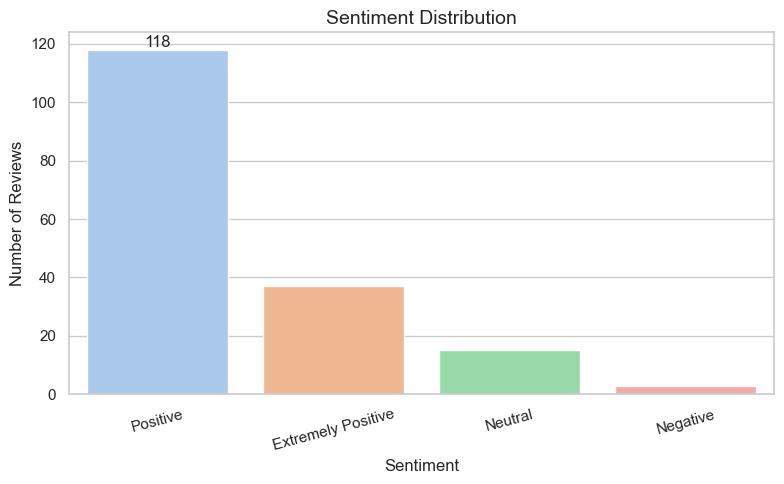

In [77]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='pastel', order=df['Sentiment'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



C:\Users\ayang\AppData\Local\Temp\ipykernel_10756\1156048154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Review_Length', data=df, palette='Set2')


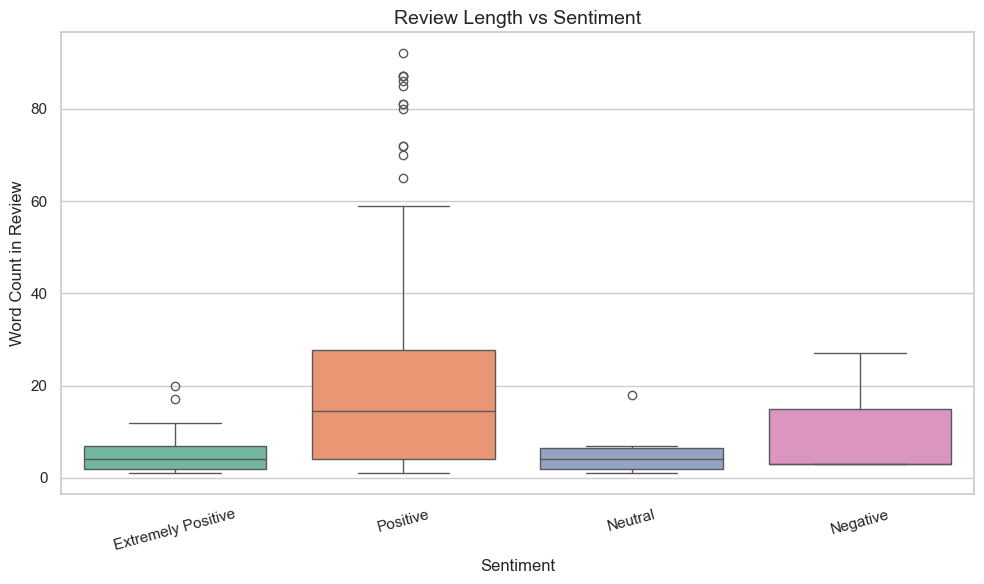

In [78]:
df['Review_Length'] = df['Reviews'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Review_Length', data=df, palette='Set2')
plt.title("Review Length vs Sentiment", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Word Count in Review")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


C:\Users\ayang\AppData\Local\Temp\ipykernel_10756\1684465544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


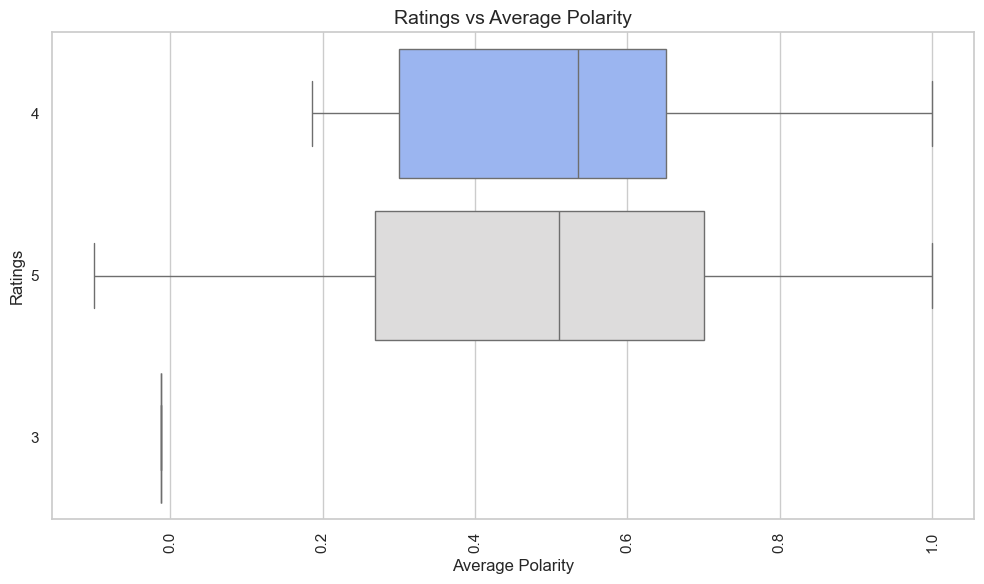

In [81]:
# Make sure you're using the correct DataFrame — assuming `df` has the data
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(
    x='Polarity',
    y='Ratings',
    data=df,
    palette='coolwarm'
)

# Add title and axis labels
plt.title('Ratings vs Average Polarity', fontsize=14)
plt.xlabel('Average Polarity', fontsize=12)
plt.ylabel('Ratings', fontsize=12)

# Rotate x-axis labels if too many unique values
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


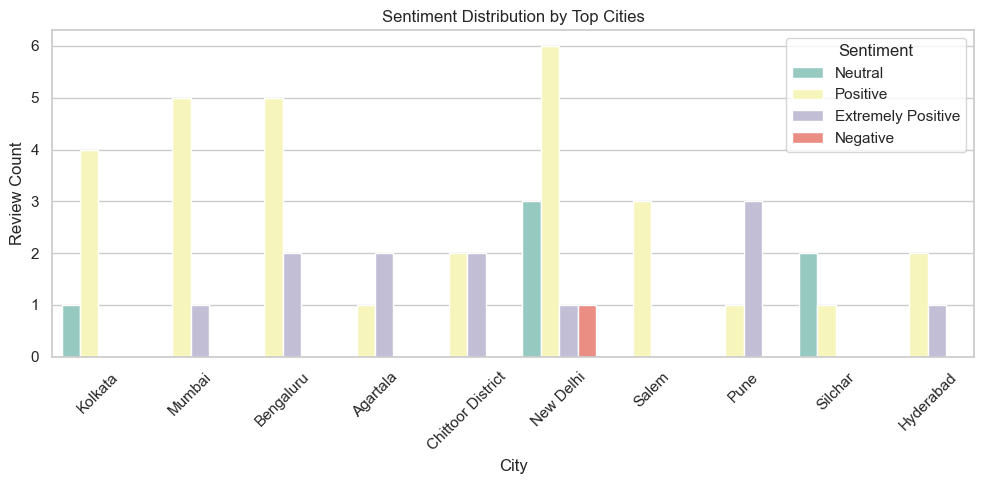

In [80]:
top_cities = df['City'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['City'].isin(top_cities)], x='City', hue='Sentiment', palette='Set3')
plt.title("Sentiment Distribution by Top Cities")
plt.xlabel("City")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
''' Visual Analysis
1. Ratings vs Average Polarity (Box Plot)
Insight: Higher ratings (like 5 and 4 stars) generally correspond with higher average sentiment polarity.

Interpretation: Users who leave 4 or 5-star ratings tend to use more positive language in their reviews, aligning well with the sentiment analysis.

2. Sentiment Distribution by Top Cities (Bar Chart)
Insight: Cities like New Delhi and Mumbai have the highest number of positive and extremely positive reviews.

Interpretation: Geographic trends suggest that urban buyers might be more satisfied or vocal about their satisfaction, possibly due to better access or expectations.

3. Review Length vs Sentiment (Box Plot)
Insight: Positive reviews vary widely in length (many long reviews), whereas extremely positive and neutral ones are relatively shorter.

Interpretation: Users giving a “Positive” sentiment might be more descriptive and detailed in sharing their experience.

4. Sentiment Distribution (Bar Chart)
Insight: Positive sentiments dominate the feedback (118+), while negative reviews are quite rare.

Interpretation: Overall reception of the iPhone 15 128GB is very favorable among Flipkart users.

 Summary of Key Takeaways from Your Notes
 Strengths
Design, camera, and performance are major selling points.

Battery improvements have been consistently highlighted.

 Areas of Concern
Price sensitivity and delivery issues are the most common drawbacks.

Minor software and accessory compatibility issues came up occasionally.

Recommendations Based on Insights
 Product Improvements
Fix bugs and minor software problems.

Enhance accessory support for a smoother experience.

 Marketing Strategy
Highlight camera, design, and battery in promotions.

Offer EMIs, exchange bonuses, or discounts to ease pricing concerns.

 Operational Enhancements
Improve delivery logistics and packaging standards.

Continue sentiment tracking to proactively resolve new issues.'''